# Real Estate Analysis of the Boston Market
## By: Taniel Migdesyan

## This is a personal project, where the goal is to analyze the Median Sale Price of the neighborhoods in Boston, from the last 5 years, only for Single-Family houses

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

import scipy.stats as sp

pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
year=['2019','2020','2021','2022','2023']
month=['01','02','03','04','05','06','07','08','09','10','11','12']

df=[]

for i in year:
  for j in month:
    url = 'https://marketstatsreports.showingtime.com/MAR_z4jps/sst/'+ i+j +'/00sf.htm'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    table=soup.find_all('table')
    dfij = pd.DataFrame(columns=['Boston Neighborhood', 'Closed Sales', '+/-', 'Median Sales Price', '+/-', 'Homes for Sales', '+/-'])

    column_data=soup.find_all('tr')
    for row in column_data[362:383]:
      row_data = row.find_all('td')
      individual_row_data=[data.text for data in row_data][1:8]
      length=len(dfij)
      dfij.loc[length]=individual_row_data

    dfij.insert(loc=0,column='Date',value=i+j)
    df.append(dfij)

In [7]:
final_df=pd.concat(df, ignore_index=True)

#Drop '+/-' columns
final_df.drop(final_df.columns[[3,5,7]],axis=1, inplace=True)

#Convert Date to the datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'], format='%Y%m');

#Convert Closed Sales/Median Sales Price and Homes for Sales to int
final_df['Closed Sales']=final_df['Closed Sales'].astype(int);
final_df['Median Sales Price'] = final_df['Median Sales Price'].str.replace('$', '').str.replace(',', '').astype(int);
final_df['Homes for Sales']=final_df['Homes for Sales'].astype(int);

#Because 'Leather District / Financial District / Chinatown' is too long, rename as 'Chinatown
final_df.iloc[list(range(9,1269,21)),1] = 'Chinatown'

#Dropping neighborhoods that made no sale, from past 5 years
final_df.set_index('Boston Neighborhood',inplace=True)
final_df=final_df.drop('Chinatown')
final_df=final_df.drop('Midtown / Theatre District')
final_df=final_df.drop('Seaport District')
final_df=final_df.drop('Waterfront')

#Reset index
final_df.reset_index(inplace = True)

display(final_df)

,Boston Neighborhood,Date,Closed Sales,Median Sales Price,Homes for Sales
0,Allston / Brighton,2019-01-01,1,665000,5
1,Back Bay,2019-01-01,0,0,5
2,Beacon Hill,2019-01-01,0,0,11
3,Charlestown,2019-01-01,5,1503500,6
4,Dorchester,2019-01-01,3,505000,7
...,...,...,...,...,...
1015,Roslindale,2023-12-01,3,640000,4
1016,Roxbury,2023-12-01,0,0,3
1017,South Boston,2023-12-01,0,0,5
1018,South End / Bay Village,2023-12-01,1,2400000,6


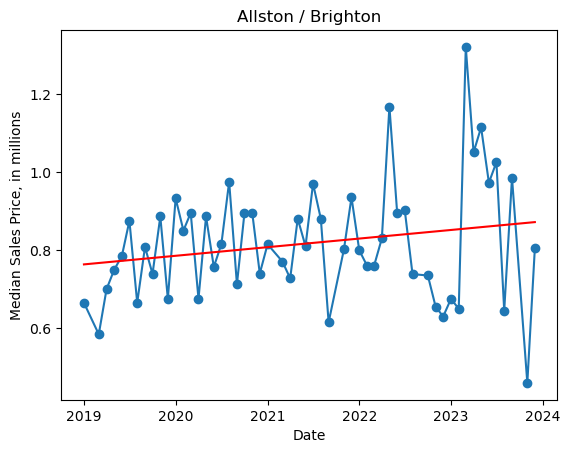

Slope of Allston / Brighton = 6.978026670341716e-19 
r-value =  0.2073661155011241 
p-value =  0.1287345840033588 
std error =  4.5218141301531375e-19


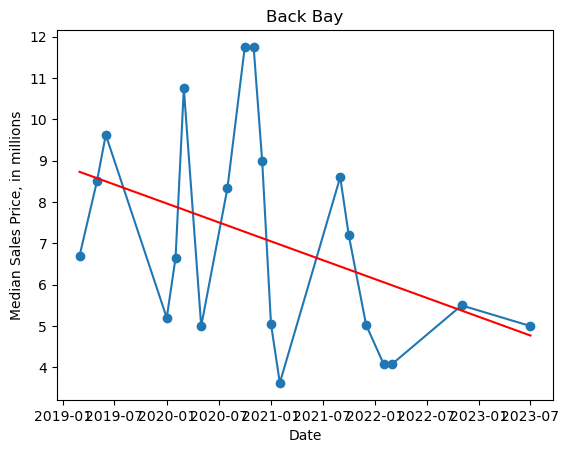

Slope of Back Bay = -2.8944996116347644e-17 
r-value =  -0.4133753152925675 
p-value =  0.07003885130448159 
std error =  1.5028015067947848e-17


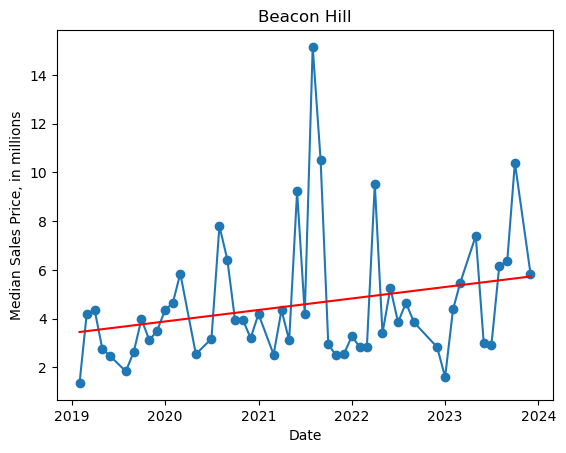

Slope of Beacon Hill = 1.494437776128265e-17 
r-value =  0.2534085020636608 
p-value =  0.07277377852734852 
std error =  8.149790660829574e-18


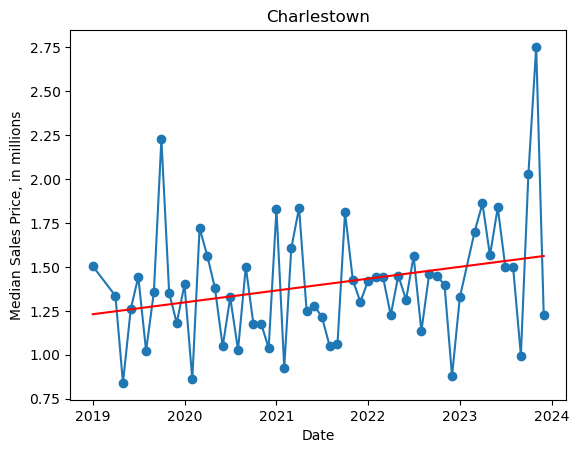

Slope of Charlestown = 2.1338789418340496e-18 
r-value =  0.2751861843254792 
p-value =  0.03828715286168504 
std error =  1.0052216583396376e-18


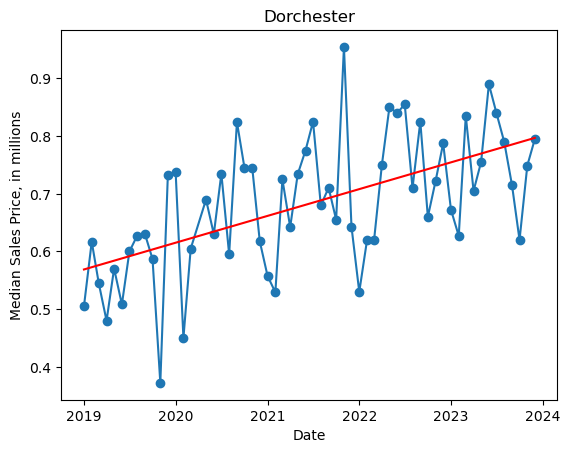

Slope of Dorchester = 1.4705178442888216e-18 
r-value =  0.574794148122177 
p-value =  1.926166758460977e-06 
std error =  2.7728861952531223e-19


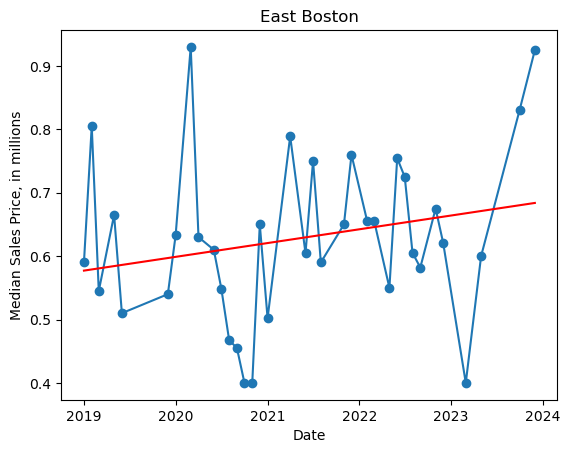

Slope of East Boston = 6.882096423697641e-19 
r-value =  0.22467635139744138 
p-value =  0.18770468743104865 
std error =  5.118893726935432e-19


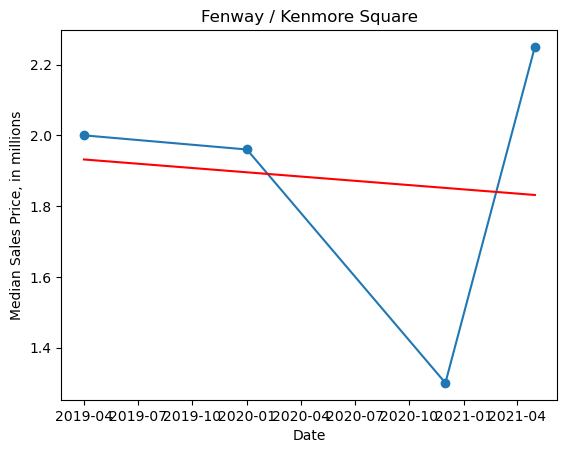

Slope of Fenway / Kenmore Square = -1.527074293742295e-18 
r-value =  -0.11097154212649703 
p-value =  0.889028457873503 
std error =  9.67036454547439e-18


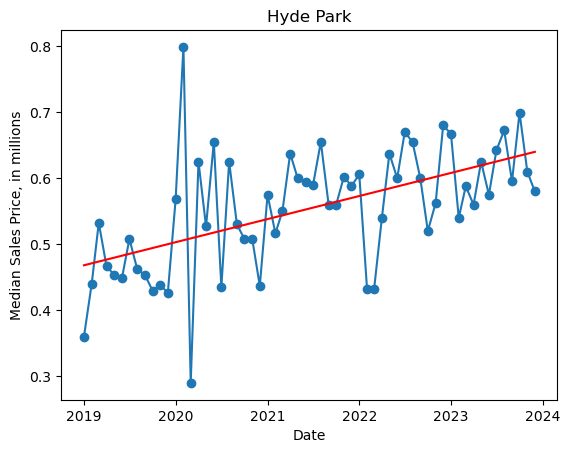

Slope of Hyde Park = 1.1078918235585857e-18 
r-value =  0.5474259789525351 
p-value =  6.000036463856874e-06 
std error =  2.2238613599447543e-19


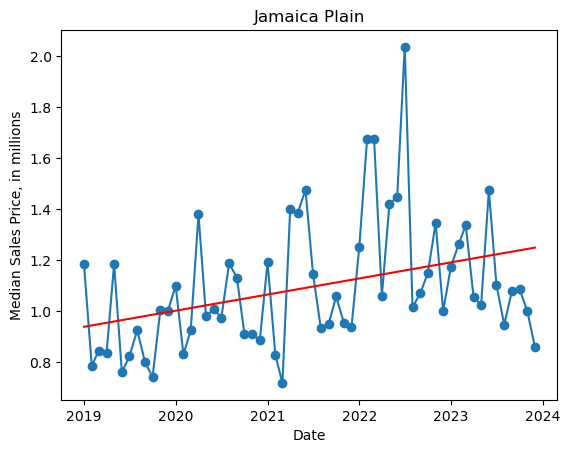

Slope of Jamaica Plain = 2.004035831530947e-18 
r-value =  0.35793803023926524 
p-value =  0.004986007442662083 
std error =  6.864550285809213e-19


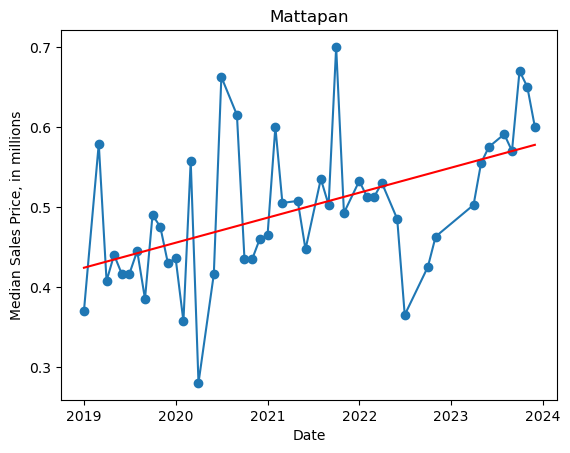

Slope of Mattapan = 9.905197864657065e-19 
r-value =  0.5091691087972272 
p-value =  0.00030186242426588357 
std error =  2.5241180784726585e-19


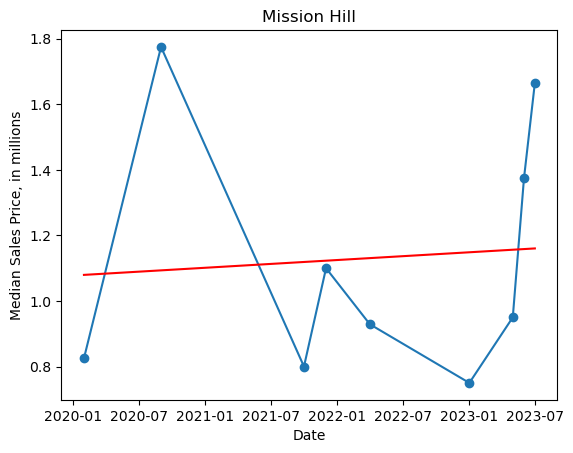

Slope of Mission Hill = 7.495487602882e-19 
r-value =  0.07590736836295668 
p-value =  0.8461033622649695 
std error =  3.721449497122268e-18


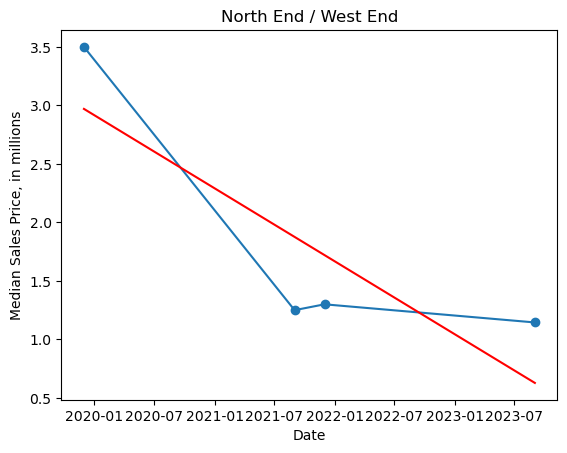

Slope of North End / West End = -1.9786676081026916e-17 
r-value =  -0.8435435130175014 
p-value =  0.15645648698249848 
std error =  8.90786937634623e-18


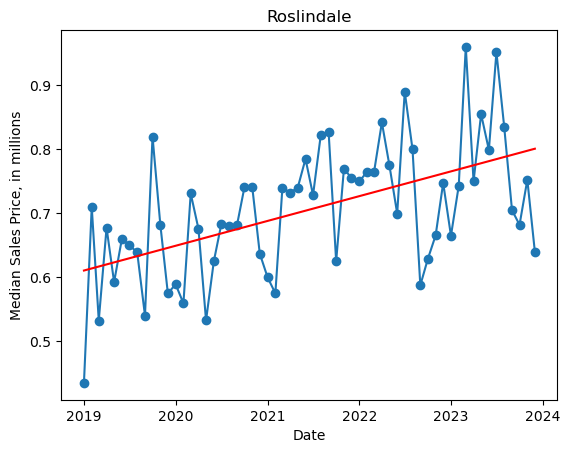

Slope of Roslindale = 1.2271522707242726e-18 
r-value =  0.5453460557749149 
p-value =  6.613923661584686e-06 
std error =  2.4766557094911133e-19


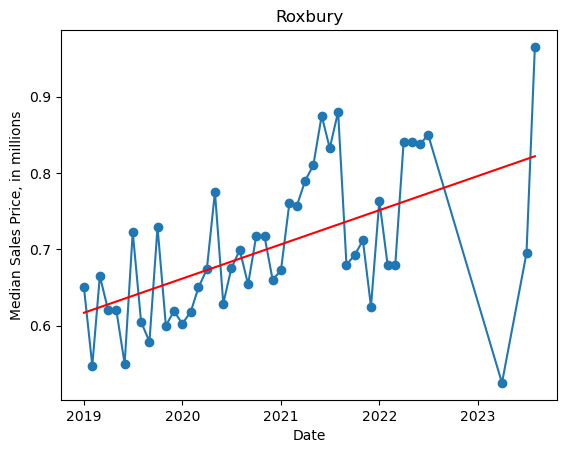

Slope of Roxbury = 1.4180913742435835e-18 
r-value =  0.5500867273824015 
p-value =  7.487913486247831e-05 
std error =  3.2455560390254e-19


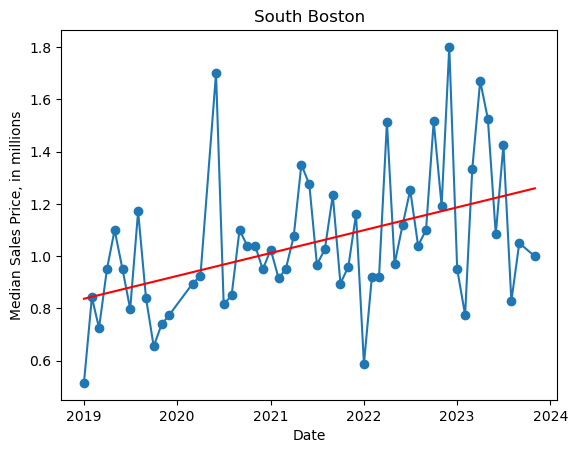

Slope of South Boston = 2.7695970455547835e-18 
r-value =  0.4539270990416101 
p-value =  0.0004998218363541317 
std error =  7.467739675551814e-19


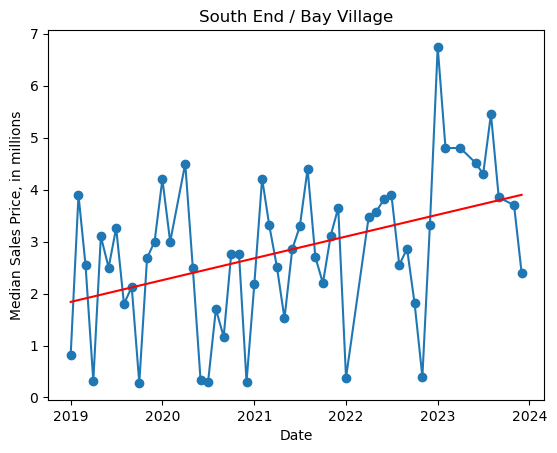

Slope of South End / Bay Village = 1.3283223332614298e-17 
r-value =  0.42051526273787376 
p-value =  0.0015453386659140336 
std error =  3.9743306182464936e-18


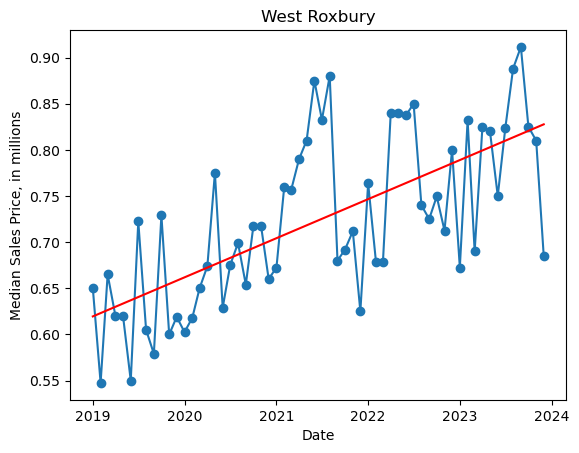

Slope of West Roxbury = 1.3419380280990797e-18 
r-value =  0.6730710402986907 
p-value =  3.828312350208748e-09 
std error =  1.9361609011647902e-19


In [8]:
x=final_df.iloc[0:17,0].astype(str)
neighborhood={}
grouped=final_df.groupby(['Boston Neighborhood'])

for i in x:
  neighborhood[i]=grouped.get_group(i)

  #To reduce the median sale price, instead of the price being in 6+ digits
  neighborhood[i]['Median Sales Price']=neighborhood[i]['Median Sales Price']/1000000

  #To disregard months with no sales
  neighborhood[i]=neighborhood[i].loc[neighborhood[i]['Median Sales Price']!=0]


  #Scatter Plot with regression line
  #Inspiration from https://mohammadimranhasan.com/linear-regression-of-time-series-data-with-pandas-library-in-python/
  neighborhood[i].set_index('Date',inplace=True)

  y_values=np.array(neighborhood[i]['Median Sales Price'].dropna().values,dtype=float)
  x_values=np.array(pd.to_datetime(neighborhood[i]['Median Sales Price'].dropna()).index.values,dtype=float)

  slope, intercept, r_value, p_value, std_err =sp.linregress(x_values,y_values)

  xf=np.linspace(min(x_values),max(x_values),100)
  xf1=xf.copy()
  xf1=pd.to_datetime(xf1)
  yf = (slope*xf)+intercept

  plt.plot(neighborhood[i]['Median Sales Price'].dropna(),marker='o')
  plt.plot(xf1,yf,color='red')

  plt.title(i)
  plt.xlabel('Date')
  plt.ylabel('Median Sales Price, in millions')

  plt.show()

  print('Slope of',i,'=',slope,'\nr-value = ', r_value, '\np-value = ', p_value, '\nstd error = ', std_err)


# Analysis/Report:

### Allston/Brighton: Beginning of 2023, had a huge increase in Median Sales Price, however went down afterwards.
### Back Bay: Very expensive, however based on the linear regression, seems to be going down.
### Beacon Hill: Also expensive and still seems to be growing
### Charlestown: Slowly growing
### Dorchester: Prices are growing within each year
### East Boston: Very steady, however a huge increase is shown from the beginning of 2023
### Fenway/Kenmore Square: Not many sales and prices seem to be decreasing a bit
### Hyde Park: Like Dorchester, prices are growing within each year
### Jamaica Plain: Prices were soaring until mid of 2022 and then fell
### Mattapan: Very unpredictable, however since mid of 2022, prices soared
### Mission Hill: Like Fenway, not many sales, yet since beginning of 2023, prices soared
### North End/West End: Not many sales, but prices seem to be going down
### Roslindale: Consistent growth within each year
### Roxbury: Consistent growth, yet 2023 saw a huge increase
### South Boston: Consistent growth
### South End/Bay Village: Expensive and very inconsistent

## Improvements:
### Very basic, yet another analysis should be done on how many homes were sold and how many were being sold, each month
### Population growth??? Any correlation?
### Poverty scale within each neighborhood?
### Condo?

# More to do...